# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results.

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# ProNet: Neural Networks in Protein Functional Classification with Amino Acid Sequences

Project Mentor: Rishi Chandra

Members: Alan Mao <smao10@jh.edu>, Tae Wan Kim <tkim104@jh.edu>, Akhil Deo <adeo1@jh.edu>, Nolan Fogarty <nfogart1@jh.edu>

GitHub: https://github.com/am12/ProNet

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Would like to accomplish #1": We were advised to focus on one model architecture for the sake of time, so we did not implement the LSTM model as an alternative to the CNN model.
2. "Would like to accomplish #2": We did not have enough time to optimize the hyperparameters space of our model.


### Completed Deliverables
1. "Must complete #1": We discuss our dataset pre-processing (in "Dataset" below).
2. "Must complete #2": We discuss training our basic CNN model (in "Methods" below).
3. "Must complete #3": We define and implement our CNN model and create a training routine with properly chosen loss functions and optimization algorithms in the GitHub repository (linked in "Methods" below).
4. "Expect to complete #1": We discuss how we improved and experimented with our model (in "Methods" below).
5. "Expect to complete #2": We discuss that we looked into integer encoding as an alternative to one-hot encoding (in "Methods" below).
6. "Expect to complete #3": We discuss that we evaluated our model performance against an external dataset (in "Results" below).
7. "Would like to accomplish #1": We discussed that we incorporate additional datasets, but for benchmarking purposes not for data augmentation (in "Results" below).

# Preliminaries

### What problem were you trying to solve or understand?

We are trying to solve the problem of easily classifying a proteins' function from its amino acid. This is import

### What are the real-world implications of this data and task?

Proteins are essential components of living organisms. Millions of proteins have been discovered, and many more are discovered every year. The ability to predict a protein's function from its amino acid sequence could revolutionize our understanding of biological processes, so classifying a protein's function has been ongoing task.

### How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

The model architecture we've chosen is a CNN. We've discussed this model architecture in lecture and breakouts, and implemented basic forms of this architecture in homeworks.

### What makes this problem unique?

Protein function identification is unique because many proteins and their functions cannot be physically seen with current technologies, methods and protocols, so in order to determine the functions of proteins that cannot be seen, they have to be approximated using machine learning or using non-ML algorithms like BLAST, which searches through annotated databases of proteins and looks for similar proteins and guesses protein function that way.

### What ethical implications does this problem have?

Accurate protein function classification is crucial for understanding disease mechanics and developing targeted therapies and medicines. If a ML model incorrectly identifies protein function, then it could hinder development of these medical treatments or have disastrous consequences if medical therapies or even agricultural products are released with flawed knowledge of protein functions within these therapies/products.

## Dataset(s)

###Describe the dataset(s) you used.

We used the COG2020 protein data base. It contains over 700,000 protein sequences of varying lengths from multiple species from different functional groups.
Another data set we looked into was Uniprot. This data base also contains a vast amount of proteins with varying lengths and subdivides the information based on whether or not it was reviewed, the general species it came from, and finally from oncology class.

###How were they collected?

Every large data set has an FTP file available to more easily download large sets of data without taking up too much storage from a different sites database. Thus, it allows us to directly download the information each ease and load it in to our environments. Specifically, we wrote a python script to download the necessary starting data. However, with the Uniprot data set, we could simply directly download the fasta files from the website.

###Why did you choose them?

The COG2020 data base contains a numerous amount of proteins but also outlines them with labels of their functional class. The fasta file contains the protein sequence, but also a code to the relevant functional class it belongs to as well. As well, Uniprot allows one to group the proteins based on function and download the fasta files for them directly without labels. While the fasta does not contain labels, the way downloaded means that all proteins written in the .fa file belongs to the same class. Ultimately, the most important factor in choosing these data sets were the fact that they had easy to access labels.

###How many examples in each?

The COG2020 data contain over 3 million protein sequences (3.21 million in total) while 200,000 samples were randomly sampled for training. The Uniprot data set

In [1]:
# Load your data and print 2-3 examples
file_name = "sample.fa"

f = open(file_name, "r")
for i in range(6):
  print(f.readline())

>ABX04500_1 amino acid adenylation domain [Herpetosiphon aurantiacus DSM 785] Q

MKRSPELVALTAPFADLGLSSREAVGLSGDLQAWLGRKVAPTVLWEYSTIQALSDFLAHDQAQQLPLPKPKPSQASATSSSAIAIVAMSCRLPGADSPEALWQLLLEGRSAIGFVPADRWDAQALYSPEARTPGKINTRWGGFLDQVDQFDPQVFGISGREASRIDPQQRLALEVAWETFERAGIAPDQLVGSATGVFLGISSNDYARLQFAQLDQLDAYAGTGNAHSIAANRLSYVFGLQGPSMALDTACSSSLVAVHLASQSLLAGECEQALAGGVNLILNPELSVTFAQAQMLSGTGECHTFDAAADGYVRSEGCGMVLLKRLDVAEAAGDPILAVIHGSAVNQDGRSNGLTAPNGQAQQAVIRQALAKAQIQPDQLSYIEAHGTGTPLGDPIEVAALQAVLGERQQPCLLGSLKSNLGHLEAAAGIAGLIKLVLAFQQQIIPAQANFKQRNPQIELGSALEIATTPQPWYSFGSYAGISSFGFGGTNAHVILGAAPIQPKRLPQPSPAPIQLLALQANSETALRQLTERYQAYLAQTEVNLADICWSAYHQRATMRHRLIVSATDKIQMLERLQHAWQAQATGSIYAEQPQPAPRIAFVCSGQGSQYVGMAQTLYQTQPLVRQILDQANSILNEYLAIPLLDVLYQPDHGALLRDTRYTQPAIFVVSYALGQLWRSWGIEPVALLGHSIGEYSAAVLAGVWSFEQGLRLVAQRAQLMHGLPEHGAMLAIRSPLESIEPLLAQHQLDLAAINGPNAVVVAGSVAAISQCAVELNQLNITNKLLDVSHGFHSRLMQPMLADFQQVLSAYPAMAPQIRLIANLDGSWHEQAPSAEYWVEHTRQPVQFYRGLQSLVASGVSHMLELGGHSTLIDLGRQAGLPNLTWLASLRRQQADWETLYHAAATLLAHGCQLNWAAM

## Pre-processing

###What features did you use or choose not to use? Why?

Given the data set, we decided to implement a method to utilize the entire avaiable cog database for training and testing of our model. In terms of the features, we decided to utilize the actual amino acid sequences one hot encoded as arrays across the sequence length of a given protein. Our features or data, essentially acted as an image that the model would train off of to understand the patterns within the convolutional neural network. Using the sequence itself followed the example set by the Splam network which used the actual DNA sequences itself. Broader structures or additional proteins attached to the protein in questions were not used to solely focus on the data. Thus, secondary and tertiary structures of a protein were not used. The hope was to predict the function of the protein based on the sequence. The central dogma of proteins entail that function is entirely derived by the structure of the protein, thus utilizing the larger structural patterns of the protein would have been against what the model was designed to do.

###If you have categorical labels, were your datasets class-balanced?

The cog dataset itself contained numerous examples of each functional class outlined by it, but the way we sampled the data may have introduced a possibility of poor class-balance depending on which proteins from which classes we trained from. Because the data set was so large, it was impractical to load all of the information in memory to train the model. Thus, we instead randomly sampled 200,000 examples from the dataset. While random sampling with a portion of the data set allows us to avoid complete overfitting on the entire data set available, this could cause situations where the data set contained many proteins with one function while missing information on other functions.

###How did you deal with missing data? What about outliers?

How did you deal with missing data? What about outliers?
The sequenece inputted to the model allowed variation, protein sequences that were shorter than the allocated fixed space were padded with null or zero values on both ends of the input matrix before training. Thus, shorter proteins could still be analyzed and used for the model. On the other hand, longer sequences were truncated with no padding to fit the input. While this is an inevitable loss of the data, analyzing the entire data set used we see that the median length of a sequence was 312 base pairs. Doubling this to just over 600 allowed us to use over roughly 99% of the data. Thus with random sampling of the data, while it is not guaranteed to not use shortened data, we overall still capture nearly all the information needed from the data set during preprocessing. Finally, any outlier proteins were still considered and possible to draw during data set creation.

###What approach(es) did you use to pre-process your data? Why?

The data set itself came in fasta format of the protein sequence and a code to the specific functional group the protein belonged in. Several preprocessing steps were required to read in the several cog data set files to properly match the sequence with a label. Ultimately, it was decided to simply one-hot encode the data to fit the model input parameters to train on the convolutional neural network, rather than a recursive neural network. While RNNs are useful to process sequential data, it is notoriously known for how difficult it can be properly train the network. Thus using the basic one-hot encodings into categorixal features allowed a way to use a CNN to test the model instead based of the work done in Splam. At the end, the data was exchanged mainly as a csv file with the sequence and label for ease of reading and access compared to dealing with a fasta format.

###Are your features continuous or categorical? How do you treat these features differently?

All features were categorical, remade as one-hot encoded values of each amino acid sequence. Thus values of [0, 1, 0, 0, ...] could indicate Glycine, while [1, 0, ...] would mean Tyrosine as an example. While debating whether or not to actually use one hot encoded values or integer encoding, it was decided that the best way to prepare the data for the model to train frame was keeping it as its one-hot version rather than applying a embedding layer or integer based encodings. Since we used a CNN, having an input of dimension (1, 600) would have not provided an appropriate input matrix to do a convolution on. While it was planned to compare the results of the CNN with an RNN, we unfortunately did not have to test an RNN, thus the use of integer / character encodings was not used.

In [17]:
# For those same examples above, what do they look like after being pre-processed?
file_name = "sample.csv"

f = open(file_name, "r")
for i in range(3):
  print(f.readline())

MK0280,GCA_000007185.1,AAM01497.1,430,1-430,430,COG0001,COG0001,0,570.0,1.0e-200,432,3-431

MA_0581,GCA_000007345.1,AAM04025.1,424,1-424,424,COG0001,COG0001,0,574.0,1.0e-200,432,3-426

PTH_0979,GCA_000010565.1,BAF59160.1,434,1-434,434,COG0001,COG0001,0,596.0,1.0e-200,432,4-431



In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

# Note, this code works best if called from terminal. The second line also requires files to present in the same directory as the code being called
# and where it is called from. At the same time, one may need to install usum with:

# pip install usum

# Or machine dependent syntax may vary as well. At the same time, usearch needs to be downloaded and placed on PATH.
# Usearch can be found here:

# https://drive5.com/usearch/download.html

python3 /src/processing/for_visuals.py 
usum e_lines.fa f_lines.fa g_lines.fa h_lines.fa i_lines.fa j_lines.fa o_lines.fa p_lines.fa c_lines.fa --labels E F G H I J O P C --maxdist 0.2 --termdist 0.3 --output example -f

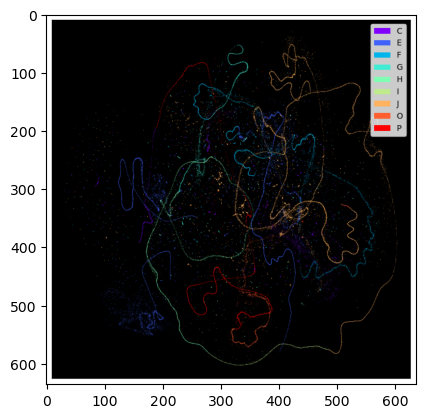

In [24]:
# What the visualization should look like
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filename = "./results/fig/presentation/umap.png"
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

# Models and Evaluation

## Experimental Setup

**How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?**

For evaluating our methods, we used several key metrics, including accuracy, precision, and sensitivity, along with visualization techniques such as confusion matrices and ROC/PR curves. These metrics were chosen because they offer a comprehensive view of the model's performance across various aspects:

- **Accuracy** measures the overall correctness of the model, which is crucial for assessing its effectiveness in classifying protein functions correctly.
- **Precision and sensitivity** (also known as recall) provide insights into the model's ability to correctly predict positive cases, balancing the rate of true positives against false positives and false negatives. This is especially important in biological datasets where some classes may be more critical or rare.
- **ROC (Receiver Operating Characteristic) and PR (Precision-Recall) curves** help in evaluating the trade-offs between true positive rates and false positive rates at various threshold settings, which is vital for models where the balance between sensitivity and specificity is crucial.

These metrics ensure that the model not only predicts accurately but also maintains a balance between various types of errors, which is essential for practical applications in protein function prediction.



**What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?**

We used CrossEntropyLoss as our primary loss function for training the model. This choice is based on the nature of our task, which is a multi-class classification problem. CrossEntropyLoss is effective for such settings because it calculates the loss by comparing the model's predicted probabilities with the true label, encouraging the model to output probabilities that closely match the actual distribution of labels.

We did not experiment with multiple loss functions in the initial stages of our project due to the following reasons:
- **Effectiveness of CrossEntropyLoss in similar tasks:** Based on literature and prior applications in multi-class classification, CrossEntropyLoss is generally reliable and robust for learning from categorical data.
- **Focus on other aspects of the model:** Our project had a significant emphasis on other variables such as model architecture, input preprocessing, and hyperparameter tuning. We chose to prioritize these elements to optimize performance before considering changes to the loss function.

**How did you split your data into train and test sets? Why?**

Our data, consisting of protein sequences, was into training and testing sets with a common strategy of approximately 85% training and 15% testing. This ratio was chosen to provide a substantial amount of data for training the model while still retaining a meaningful subset for independently evaluating its performance. Here’s why this split is effective:

- **Sufficient Training Data:** The 85% training set ensures that the model has access to a diverse array of examples from which it can learn, which is crucial for the deep learning models employed in our project that require large amounts of data to generalize well.
- **Robust Testing Data:** The 15% testing set is large enough to validate the model's performance across a variety of unseen data points, providing confidence that our model can generalize beyond the training data.

This split helps in reducing overfitting while ensuring that the model learns the underlying patterns in the data rather than memorizing the specific details of the training examples.






In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo

# Link to Git repo: https://github.com/am12/ProNet
# Link to train: https://github.com/am12/ProNet/blob/main/src/2_train.py

## Baselines

# What baselines did you compare against? Why are these reasonable?
Given the uniqueness of our task there were no directly comparable machine learning baselines available for reference. In traditional protein function prediction, methods often rely on known structures, motifs, or evolutionary relationships rather than purely sequence-based predictions. Therefore, establishing a baseline was challenging due to the novelty of our approach.

# Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?
Most existing tools, such as AlphaFold, focus on predicting protein structures. While these tools are highly advanced, their direct applicability to function prediction from sequence alone is limited. Studies using these tools show impressive performance in structural prediction but do not directly translate to functional outcomes. Since no other models have been trained on our dataset, it was difficult to perfectly contexualize our work. However, overall we believe we achieved good performance since our predictions were >95% correct on our test dataset.

## Methods

#### What methods did you choose? Why did you choose them?

In our project, we chose to implement a CNN for the classification of proteins based on their amino acid sequences. We opted for CNNs due to their effectiveness in pattern recognition tasks, especially in handling data like amino acid sequences. The decision to use CNNs was influenced by their ability to automatically learn hierarchical features from the input data, which is essential for capturing the complex relationships between amino acid sequences and protein functions. We were also influenced by SPLAM, a model that identified probability of a sequence being a donor or acceptor site or neither after being trained on 800nt donor/acceptor pairs. Since SPLAM used CNNs, and SPLAM has a similar input and a somewhat similar output (we realized we would have to tweak the output), and SPLAM had very good results, we thought a CNN woudl be the best method to solve this problem.

#### How did you train these methods, and how did you evaluate them? Why?

We created a 41-layer deep learning model and trained it on 200,000 protein sequences, sampled from 3.2 million sequences from COG2020. The model was trained for 12 epochs. The otuput of the model is the raw logits (25 classes). We evaluated the model on a toy dataset of 3,000 proteins that we created from UniProtKB. These 3,000 proteins had 6 of the labels that were the same or similar to labels used by COG2020.

#### Which methods were easy/difficult to implement and train? Why?

Implementing the CNN model was relatively straightforward, as there are well-established frameworks such as PyTorch available for building and training CNNs. However, tuning the hyperparameters and optimizing the model architecture posed some challenges. The choice of hyperparameters, such as the number of layers and optimizers, required experimentation and fine-tuning to achieve optimal performance.


#### For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

We evaluated and experimented with number of layers, optimizer, and learning rate. We started with a 32-layer model, and added more layers to try and capture more complex rlationships between the data. We ended with a 41-layer model, with 40 layers convolutional layers and one output layer. For our optimizer, we started with the Adam optimizer, and ran some basic tests and realized that the AdamW optimizer would lead to lower training loss and better generalization overall. Finally, we started with linear and step schedulers, and then expanded out to a couple other common learning rate schedulers. We found the best results with a LambdaLR cosine scheduler with warmup.

Changing the model architecture (adding more layers) certainly improved performance. The model wasn't too sensitive to all the other hyperparameter settings, the differences were very minimal.

In [ ]:
# Code for training models, or link to your Git repository

# Link to Git repo: https://github.com/am12/ProNet
# Link to ProNet model: https://github.com/am12/ProNet/blob/main/src/pronet.py

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

# See Results and Figures Folder pngs
# Link to figures: https://github.com/am12/ProNet/blob/main/results

## Results

###Show tables comparing your methods to the baselines.

###What about these results surprised you? Why?

After the first epoch, the model stated it was able to attain nearly 100% train accuracy which surprised all of us. We suspected it to be an error, but further analysis of the code did not indicate where the error, if there is one, could occur. The loss between the train and test data sets also remained extremely high, managing to acheive a great accuracy throughout each epoch. Overall, since the model only trained from a subset of the whole data set, it could be said that the model may have had an inbalance of data to train on, causing it to acquire more training data on certain functional protein classes than others.

###Did your models over- or under-fit? How can you tell? What did you do to address these issues?

It is very well possible the model has over fitted on the train data, given that we only provided the model with information / data from a small subset of the whole 3 million sample sized data set. Thus, although we did randomly sample the entire data set to generate the information the model would train on, it could be that certain classes where not represented well. The model would then overfit on what it saw rather than be able to develop a more robust and general way to distinguish the protein sequences to the functional classes. One way to address this issue is to divide the data set based on all the functional classes and evenly select the same amount of samples for each class, shuffle the data gathered, and then train the model that way. This would prevent the over fitting on a certain subset of classes, and aid in the robustness of the neural network.

###What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data? 

Based on the evaluation metrics made from our data, it appears that the model is able to effectively learn and train from the data set efficiently enough to acheive quite a high accuracy during testing. The ROC curves and confusion matrixes indicate strong prediction ability of the model, being able to distinguish seperate classes more effectively than expected when most of the labels lie along the diagonal of the confusion matrix. At the same time, the ROC curves tendency to peak towards the top left of the plot implies a high ability for the model to classify the protein sequences correctly. However, we expect the model to show improvement if the data provided was more uniform across classes. This could have allowed the model to acheive even higher accuracies in the test when it may have been able to be exposed to more types of data classes in training. Considering how the model might behave on different data, we were able to use the model on the Uniprot data base, being able to correctly match the protein sequences of one functional class with itself (All samples from one class inputted stayed mostly together in the output). More data can generally help a model train, however the type of data inputted would require adherence with the label scheme we have decided on for the model, that being the labels outlined in the Cog2020 data set.

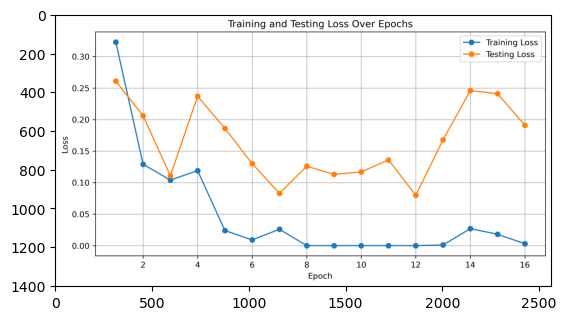

In [23]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filename = "./results/fig/2_loss_plot.png"
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

**What concepts from lecture/breakout were most relevant to your project? How so?**

The concepts that were most relevant were types of deep learning architectures, CNNs, feature engineering techniques (one-hot encoding, for example), what hyperparameters are and optimizing hyperparameters, and metrics for evaluation. These were the most revelant because we had to use each and every one of these concepts from the design to the development, revision, and finally evaluation of our model.

**What aspects of your project did you find most surprising?**

We were surprised by the extent to which our model was able to extract meaningful features from protein sequences and properly classify their functions. In class, we refer to parts of machine learning as magic because it's very difficult to determine how each every component (model, hyperparameters, etc) effects the outcome, so in essence it is magic. We knew that out model would perform fairly well as it was based on the SPLAM model, which did have good performance. But we will admit we were shocked as to how good our train and test accuracy was, and that the SPLAM architecture (with a few tweaks, of course) was able to translate over to protein function classification given an amino acid sequence.

**What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?**

The first lesson that we want to remember is the importance of feature engineering. We spent a bit of time debating and experimenting with one-hot encoding and character encoding, ultimately staying true to one-hot encoding. This choice led to very good model performance, and we realized just how important feature engineering is. We do think that this less would transfer over to other datasets and models. Another lesson that we took away from this project is the importance of prior research. We did not realize until we were done training our model on COG2020 that the other protein databases that we were planning to use didn't use the same labels as the COG2020 database. So, our team had to find labels that were similar between COG2020 and other databases (we ultimately chose UniProtKB), in order to evaluate our model on external data. Though this wasn't necessarily too painful, it was time-consuming and had we realized this before, we could have properly allocated more time to the task.

**If you had two more weeks to work on this project, what would you do next? Why?**

1. Experiment with different hyperparameters like different loss functions, learning rates and learning rate schedulers, epochs, and optimization algorithms to improve model performance.
2. Build a more comprehensive benchmarking set. Since the function labels from other protein databases like UniProtKB are different than the ones that COG2020 does, it's difficult to cobble together a large and proper benchmark set. So, if we had more time, we would look through more of UniProtKB's data and labels and find the proteins that have function labels that align closely (or closely enough) to the function labels in COG2020 and add those to our benchmark so we could get a more accurate understanding of how our model fares against external databases.

Tuning hyperparameters was one of the deliverables that we were not able to accomplish, so we would want to work on that so that we are able to create the best model for protein function identification possible. In order to determine whether or not the model is truly great, we need a higher quality benchmark set, which is why we would also find more proteins that have similar function labels as to COG2020.